In [3]:
# Report 1: 
# Compare monthly 2021 sales to 2022 and determine has ‘Happy Deliveries’ sales grown.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
# read dataset of 'order' and 'customer' and create dataframe

In [6]:
hd_order = pd.read_csv('/Users/xufeishao/Desktop/Bootcamp/003 Python/project/Happy Deliveries/data/hd_orders.csv')

In [7]:
hd_customer = pd.read_excel('/Users/xufeishao/Desktop/Bootcamp/003 Python/project/Happy Deliveries/data/hd_customers.xlsx')

In [8]:
hd_customer.head()

,id,first_name,last_name,age,city,email
0,1001,Samuel,Zavala,139,Dublin,Zavala_Samuel46@xfinity.com
1,1002,Sara,Lee,33,Dublin,Sara.L@hotmail.com
2,1003,Michael,Davidson,23,Dublin,MichaelDavidson82@att.com
3,1004,Willie,Sims,29,Sligo,Willie_S@yahoo.com
4,1005,Carly,Armstrong,22,Mayo,CArmstrong@mail.com


In [9]:
# check number of unique 'cust_id' in order 
hd_order['cust_id'].nunique()

406

In [10]:
# check data types
hd_order.dtypes

order_id                 int64
order_timestamp         object
delivered_timestamp     object
driver_id                int64
restaurant_id            int64
cust_id                  int64
delivery_region         object
discount_applied          bool
discount_code           object
order_total            float64
discount_pc            float64
status                  object
dtype: object

In [11]:
# check number of unique 'id' in customer 
hd_customer['id'].nunique()

406

In [12]:
hd_order.head()

,order_id,order_timestamp,delivered_timestamp,driver_id,restaurant_id,cust_id,delivery_region,discount_applied,discount_code,order_total,discount_pc,status
0,100001,26/11/2021 18:22,26/11/2021 18:49,273,105,1016,Dublin,True,BLACKFRIDAY21,69.46,20.0,COMPLETED
1,100002,11/07/2021 21:23,11/07/2021 21:53,43,219,1017,Cork,False,NaN,69.40,NaN,COMPLETED
2,100003,27/04/2021 17:28,27/04/2021 17:55,299,48,1019,Dublin,False,NaN,47.16,NaN,COMPLETED
3,100004,22/02/2021 18:08,22/02/2021 18:35,320,233,1020,Dublin,False,NaN,47.15,NaN,COMPLETED
4,100005,21/06/2021 18:14,21/06/2021 18:44,41,207,1024,Dublin,False,NaN,47.00,NaN,COMPLETED


In [13]:
# since the value type of order_time and delivery time are object, change the datatype to datetime
hd_order['order_timestamp'] = pd.to_datetime(hd_order['order_timestamp'],dayfirst=True)

In [14]:
hd_order['delivered_timestamp'] = pd.to_datetime(hd_order['delivered_timestamp'],dayfirst=True)

In [15]:
hd_order.dtypes

order_id                        int64
order_timestamp        datetime64[ns]
delivered_timestamp    datetime64[ns]
driver_id                       int64
restaurant_id                   int64
cust_id                         int64
delivery_region                object
discount_applied                 bool
discount_code                  object
order_total                   float64
discount_pc                   float64
status                         object
dtype: object

In [16]:
# extract month and year from order_time
hd_order['order_month'] = pd.to_datetime(hd_order['order_timestamp']).dt.month

In [17]:
hd_order.head()

,order_id,order_timestamp,delivered_timestamp,driver_id,restaurant_id,cust_id,delivery_region,discount_applied,discount_code,order_total,discount_pc,status,order_month
0,100001,2021-11-26 18:22:00,2021-11-26 18:49:00,273,105,1016,Dublin,True,BLACKFRIDAY21,69.46,20.0,COMPLETED,11
1,100002,2021-07-11 21:23:00,2021-07-11 21:53:00,43,219,1017,Cork,False,NaN,69.40,NaN,COMPLETED,7
2,100003,2021-04-27 17:28:00,2021-04-27 17:55:00,299,48,1019,Dublin,False,NaN,47.16,NaN,COMPLETED,4
3,100004,2021-02-22 18:08:00,2021-02-22 18:35:00,320,233,1020,Dublin,False,NaN,47.15,NaN,COMPLETED,2
4,100005,2021-06-21 18:14:00,2021-06-21 18:44:00,41,207,1024,Dublin,False,NaN,47.00,NaN,COMPLETED,6


In [18]:
hd_order['order_year'] = pd.to_datetime(hd_order['order_timestamp']).dt.year

In [19]:
hd_order.head()

,order_id,order_timestamp,delivered_timestamp,driver_id,restaurant_id,cust_id,delivery_region,discount_applied,discount_code,order_total,discount_pc,status,order_month,order_year
0,100001,2021-11-26 18:22:00,2021-11-26 18:49:00,273,105,1016,Dublin,True,BLACKFRIDAY21,69.46,20.0,COMPLETED,11,2021
1,100002,2021-07-11 21:23:00,2021-07-11 21:53:00,43,219,1017,Cork,False,NaN,69.40,NaN,COMPLETED,7,2021
2,100003,2021-04-27 17:28:00,2021-04-27 17:55:00,299,48,1019,Dublin,False,NaN,47.16,NaN,COMPLETED,4,2021
3,100004,2021-02-22 18:08:00,2021-02-22 18:35:00,320,233,1020,Dublin,False,NaN,47.15,NaN,COMPLETED,2,2021
4,100005,2021-06-21 18:14:00,2021-06-21 18:44:00,41,207,1024,Dublin,False,NaN,47.00,NaN,COMPLETED,6,2021


In [20]:
# find out the total order by month in 2021
sales_2021 = hd_order[hd_order['order_year']== 2021]\
                         .groupby('order_month')['order_total']\
                         .sum().to_frame('amount')

In [21]:
sales_2021.head()

,amount
order_month,
1,219.77
2,533.80
3,593.11
4,724.45
5,856.27


In [22]:
#find out the total order by month in 2022
sales_2022 = hd_order[hd_order['order_year']== 2022]\
                         .groupby('order_month')['order_total']\
                         .sum().to_frame('amount')

In [23]:
sales_2022.head()

,amount
order_month,
1,358.43
2,748.36
3,1014.82
4,814.01
5,958.90


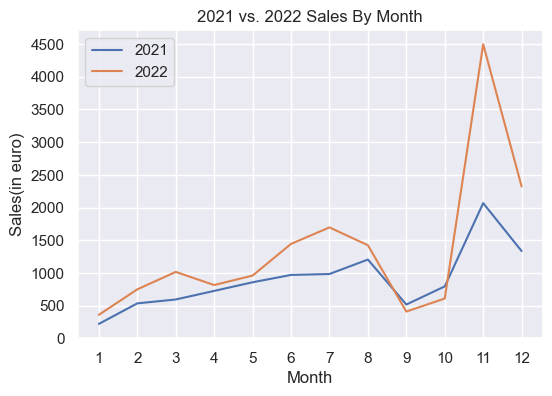

In [24]:
# line plotting comparing sales by month in 2021 and 2022
fig = plt.figure(figsize=(6,4))

sns.set(style="darkgrid")

ax = sns.lineplot(data = sales_2021, x='order_month', y='amount', label='2021')
ax = sns.lineplot(data = sales_2022, x='order_month', y='amount', label='2022')

ax.set_title('2021 vs. 2022 Sales By Month')
ax.set_xlabel('Month')
ax.set_xticks(range(1, 13, 1)) 
ax.set_ylabel('Sales(in euro)')
ax.set_yticks(range(0, 5000, 500)) 
plt.show()

In [25]:
# Report 2: Looking to the loyalty card holders, what is the age distribution of those customers?

In [26]:
# Browse the data
hd_customer.sort_values(by = 'age', ascending=False)

,id,first_name,last_name,age,city,email
70,1071,David,Gibson,160,Dublin,DavidGibson@xfinity.com
30,1031,Jessica,Hendricks,150,Dublin,Jessica.H85@xfinity.com
0,1001,Samuel,Zavala,139,Dublin,Zavala_Samuel46@xfinity.com
363,1364,Penny,Cummings,75,Galway,PCummings@zoho.com
8,1009,Sheri,Aguilar,71,Kerry,Aguilar.Sheri22@att.com
...,...,...,...,...,...,...
339,1340,Amanda,Miller,18,Limerick,Amanda.M@comcast.net
271,1272,Carolyn,Patterson,18,Limerick,Patterson.Carolyn@hotmail.com
59,1060,Amy,Farmer,8,Kerry,Farmer.Amy@verizon.com
164,1165,Christopher,Ramsey,6,Waterford,Ramsey_Christopher@hotmail.com


In [27]:
# detect age abnormalities
hd_customer['age'].describe()

count    406.000000
mean      29.354680
std       14.347274
min        6.000000
25%       22.000000
50%       26.000000
75%       31.000000
max      160.000000
Name: age, dtype: float64

<Axes: >

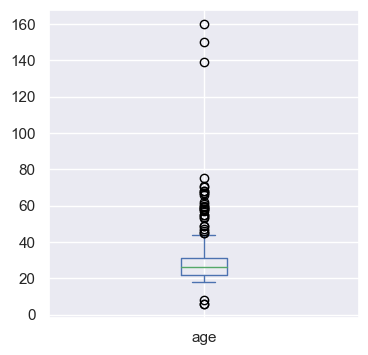

In [28]:
hd_customer['age'].plot(kind='box',figsize=(4,4))

In [29]:
# remove age outliners
min_threshold,max_threshold = hd_customer['age'].quantile([0.006,0.994])

In [30]:
min_threshold, max_threshold

(12.3, 111.4800000000032)

In [31]:
hd_customer_clean = hd_customer.loc[(hd_customer['age'] > min_threshold) & (hd_customer['age'] < max_threshold) ]

In [32]:
hd_customer_clean.describe()

,id,age
count,400.000000,400.000000
mean,1205.475000,28.622500
std,116.924496,9.753863
min,1002.000000,18.000000
25%,1105.750000,22.000000
50%,1206.500000,26.000000
75%,1306.250000,31.000000
max,1406.000000,75.000000


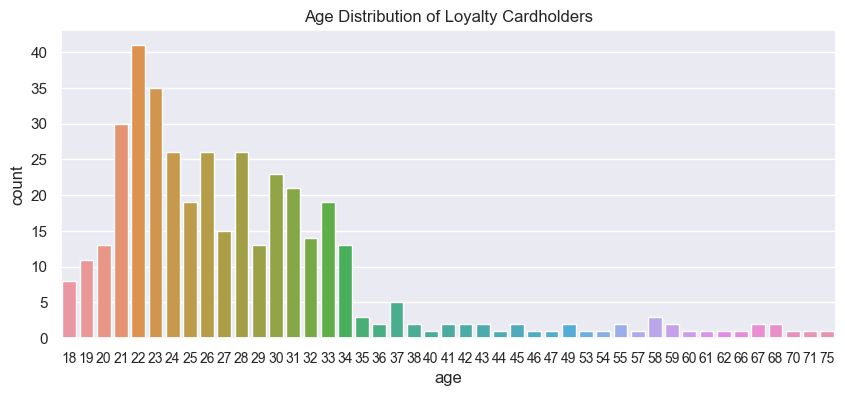

In [33]:
# countplot based on cleaned data (removed age outliners)
fig = plt.figure(figsize=(10,4))

sns.set(style="darkgrid")
sns.countplot(x='age',data=hd_customer_clean)
plt.xticks(fontsize=10)
plt.title('Age Distribution of Loyalty Cardholders')
plt.show()

In [34]:
# Report 3: Is there relationship between the amount spend by a loyalty cardholder and their age?

In [35]:
# join cleaned customer dataframe with order
ord_cust = hd_customer_clean.merge(hd_order,left_on='id',right_on='cust_id',how='left')

In [36]:
ord_cust.shape

(979, 20)

In [37]:
ord_cust.head()

,id,first_name,last_name,age,city,email,order_id,order_timestamp,delivered_timestamp,driver_id,restaurant_id,cust_id,delivery_region,discount_applied,discount_code,order_total,discount_pc,status,order_month,order_year
0,1002,Sara,Lee,33,Dublin,Sara.L@hotmail.com,100404,2022-01-12 18:16:00,2022-01-12 18:49:00,200,47,1002,Dublin,False,NaN,20.63,NaN,COMPLETED,1,2022
1,1002,Sara,Lee,33,Dublin,Sara.L@hotmail.com,100674,2022-08-17 17:55:00,2022-08-17 18:28:00,254,9,1002,Dublin,False,NaN,22.26,NaN,COMPLETED,8,2022
2,1003,Michael,Davidson,23,Dublin,MichaelDavidson82@att.com,100622,2022-07-14 21:45:00,2022-07-14 22:21:00,77,5,1003,Cork,False,NaN,28.24,NaN,COMPLETED,7,2022
3,1003,Michael,Davidson,23,Dublin,MichaelDavidson82@att.com,100652,2022-08-01 23:25:00,2022-08-01 23:58:00,314,107,1003,Dublin,False,NaN,9.92,NaN,COMPLETED,8,2022
4,1004,Willie,Sims,29,Sligo,Willie_S@yahoo.com,100857,2022-11-26 19:34:00,2022-11-26 20:08:00,177,274,1004,Galway,False,NaN,11.88,NaN,COMPLETED,11,2022


In [38]:
ord_cust['discount_pc'].isnull().sum()

889

In [39]:
# fill the null value of discount_pc with 0
ord_cust['discount_pc'] = ord_cust['discount_pc'].fillna(0)

In [40]:
ord_cust['discount_pc'].isnull().sum()

0

In [41]:
# create a pivot column for 'status' as 'status_piv' , set completed = 1, cancelled = 0
ord_cust['status_piv'] = np.where(ord_cust['status']== 'COMPLETED', 1, 0)

In [42]:
ord_cust[ord_cust['status']!= 'COMPLETED']

,id,first_name,last_name,age,city,email,order_id,order_timestamp,delivered_timestamp,driver_id,...,cust_id,delivery_region,discount_applied,discount_code,order_total,discount_pc,status,order_month,order_year,status_piv
272,1073,Joseph,Phillips,31,Mayo,JosephPhillips@aol.com,100955,2022-12-15 17:03:00,NaT,368,...,1073,Sligo,False,NaN,29.33,0.0,CANCELLED,12,2022,0
297,1081,Lisa,Navarro,22,Dublin,Navarro_Lisa20@hotmail.com,100031,2021-07-22 23:42:00,NaT,66,...,1081,Cork,False,NaN,42.87,0.0,CANCELLED,7,2021,0
439,1153,Darlene,Johnson,26,Limerick,DarleneJohnson@aol.com,100065,2021-03-02 20:12:00,NaT,204,...,1153,Dublin,False,NaN,39.11,0.0,CANCELLED,3,2021,0
514,1190,Suzanne,Mccarty,31,Dublin,Mccarty_Suzanne36@zoho.com,100117,2021-10-17 17:34:00,NaT,232,...,1190,Kerry,False,NaN,33.02,0.0,CANCELLED,10,2021,0
755,1285,Michelle,Zamora,30,Dublin,Michelle_Z@verizon.com,100242,2021-01-01 20:16:00,NaT,288,...,1285,Dublin,False,NaN,22.73,0.0,CANCELLED,1,2021,0
932,1363,Kenneth,Olsen,33,Meath,Olsen.Kenneth@outlook.com,100176,2021-10-08 18:11:00,NaT,216,...,1363,Cork,False,NaN,28.62,0.0,CANCELLED,10,2021,0
965,1393,Katherine,Lucas,21,Dublin,Lucas.Katherine@yahoo.com,100207,2021-11-10 21:35:00,NaT,353,...,1393,Dublin,False,NaN,25.03,0.0,CANCELLED,11,2021,0


In [43]:
# calculate actual spending considering 'discount_pc' and'status',when'cancelled' refund the payment,thus 'act_spend'== 0
ord_cust['act_spend'] = ord_cust['order_total'] * (1-(ord_cust['discount_pc']/100)) * ord_cust['status_piv']

In [44]:
ord_cust.head()

,id,first_name,last_name,age,city,email,order_id,order_timestamp,delivered_timestamp,driver_id,...,delivery_region,discount_applied,discount_code,order_total,discount_pc,status,order_month,order_year,status_piv,act_spend
0,1002,Sara,Lee,33,Dublin,Sara.L@hotmail.com,100404,2022-01-12 18:16:00,2022-01-12 18:49:00,200,...,Dublin,False,NaN,20.63,0.0,COMPLETED,1,2022,1,20.63
1,1002,Sara,Lee,33,Dublin,Sara.L@hotmail.com,100674,2022-08-17 17:55:00,2022-08-17 18:28:00,254,...,Dublin,False,NaN,22.26,0.0,COMPLETED,8,2022,1,22.26
2,1003,Michael,Davidson,23,Dublin,MichaelDavidson82@att.com,100622,2022-07-14 21:45:00,2022-07-14 22:21:00,77,...,Cork,False,NaN,28.24,0.0,COMPLETED,7,2022,1,28.24
3,1003,Michael,Davidson,23,Dublin,MichaelDavidson82@att.com,100652,2022-08-01 23:25:00,2022-08-01 23:58:00,314,...,Dublin,False,NaN,9.92,0.0,COMPLETED,8,2022,1,9.92
4,1004,Willie,Sims,29,Sligo,Willie_S@yahoo.com,100857,2022-11-26 19:34:00,2022-11-26 20:08:00,177,...,Galway,False,NaN,11.88,0.0,COMPLETED,11,2022,1,11.88


In [45]:
# generate a dataframe with customer id, age, discount_applied and total_spend / customer id
age_spend = ord_cust.groupby(['id','age','discount_applied'])['act_spend'].sum().to_frame('total_spend')

In [46]:
age_spend.head(12)

,,,total_spend
id,age,discount_applied,
1002,33,False,42.890
1003,23,False,38.160
1004,29,False,49.090
1005,22,False,66.980
1006,26,False,40.380
1007,58,False,55.610
1008,49,False,44.880
1009,71,False,149.000
1010,66,False,69.870


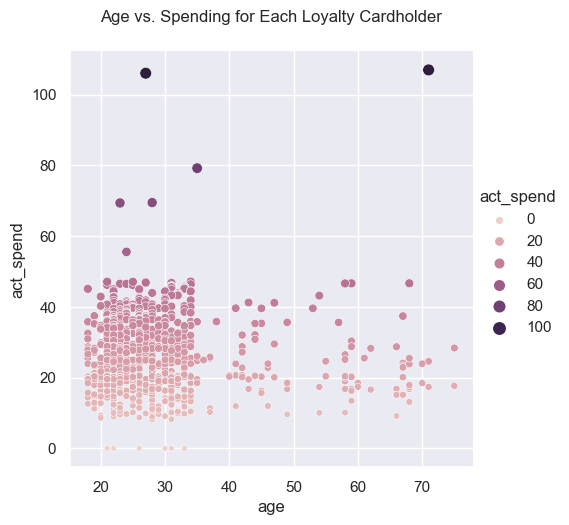

In [47]:
# scatter plot to find out age vs. spending per loyalty cardholder (customer)

sns.relplot(x='age',y='act_spend',data=ord_cust,kind='scatter',size='act_spend',hue='act_spend')
plt.title('Age vs. Spending for Each Loyalty Cardholder',y=1.05)
plt.show()

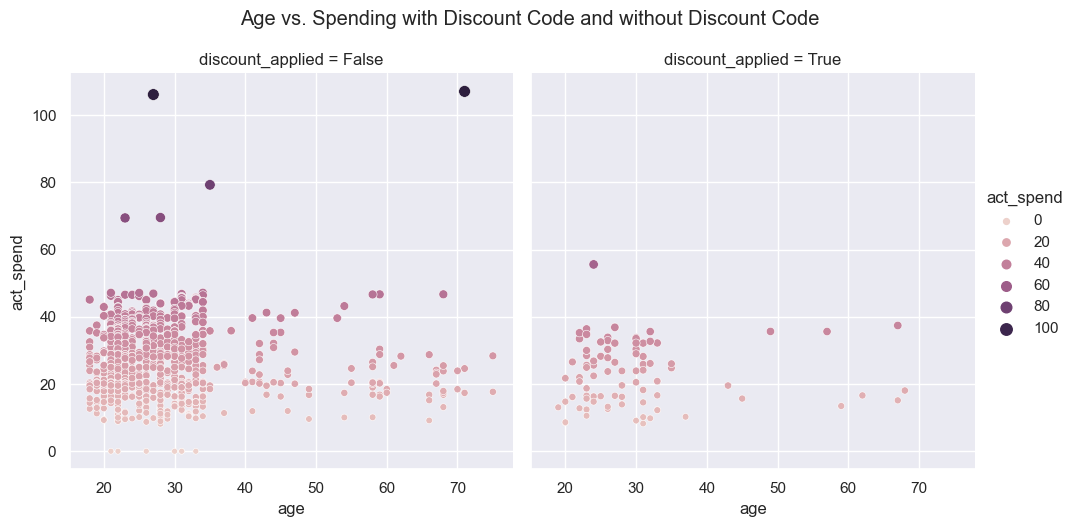

In [48]:
# Report 4: Is there a relationship between the amount of a payment,the age of a person 
# and whether or not they used discount codes

g = sns.relplot(x='age',y='act_spend',data=ord_cust,kind='scatter',size='act_spend',col='discount_applied',hue='act_spend')
g.fig.suptitle('Age vs. Spending with Discount Code and without Discount Code',y=1.05)
plt.show()

In [49]:
# Report 5: Compare the sales for 2022 across all regions

In [50]:
# calculate sales per region in 2022
reg_sales_2022 = hd_order[hd_order['order_year']== 2022]\
                   .groupby('delivery_region')['order_total']\
                .sum().sort_values().to_frame('total_amount')

In [51]:
reg_sales_2022.head()

,total_amount
delivery_region,
Leitrim,493.89
Sligo,914.41
Kerry,1399.64
Galway,2752.46
Cork,3540.83


In [52]:
reg_sales_2022['delivery_region']= reg_sales_2022.index

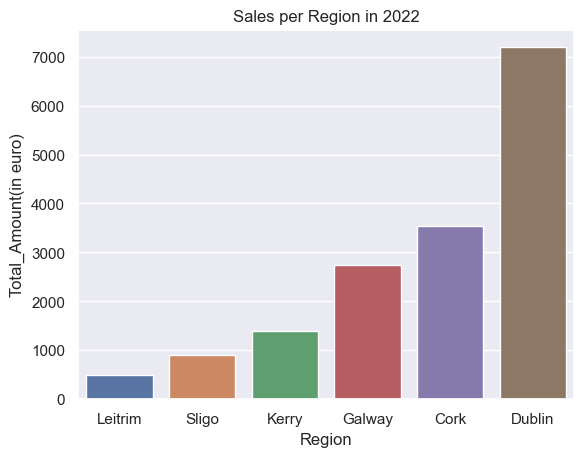

In [53]:
# bar plot sales per region in 2022
r = sns.barplot(x = 'delivery_region', y='total_amount',data=reg_sales_2022)
r.set(xlabel='Region', ylabel='Total_Amount(in euro)')
plt.title('Sales per Region in 2022')
plt.show()

In [54]:
# Question 6: 
# Christmas is coming and Happy Deliveries want to reward their high spending customers. 
# Who are the top 10 highest spending customers in 2022?
# Find their ID, name and email address for the marketing department to contact them with a reward.

In [55]:
top_10_cust_2022 = ord_cust[ord_cust['order_year']== 2022]\
                                 .groupby(['id','first_name','last_name','email'])\
                                 ['act_spend'].sum().sort_values(ascending=False).nlargest(10)

In [56]:
top_10_cust_2022

id    first_name  last_name  email                         
1027  Jason       Dudley     Jason_D@zoho.com                  146.492
1126  Deanna      Knight     DeannaKnight@protonmail.com       146.300
1009  Sheri       Aguilar    Aguilar.Sheri22@att.com           131.640
1023  Gabrielle   Morgan     GMorgan48@mail.com                118.300
1021  Joshua      Kidd       Joshua_K@att.com                  115.130
1018  David       Snyder     David.S@hotmail.com               105.220
1227  Andrew      Cantu      Andrew_Cantu@yandex.com           103.940
1028  David       Murphy     Murphy.David@mail.com             102.080
1059  Brent       Harrell    Harrell.Brent13@protonmail.com     99.380
1029  Meagan      Gonzalez   Gonzalez_Meagan43@mail.com         96.176
Name: act_spend, dtype: float64

In [57]:
# Question 7: In order to keep up with the anticipated increase in sales over Christmas, 
# Happy Deliveries want to find what are the top 3 restaurants, so they can allocate their resources more efficiently. 
# What are the top 3 restaurants in terms of sales for 2022?

In [58]:
top_3_restaurant_2022 = hd_order[hd_order['order_year']== 2022]\
                       .groupby('restaurant_id')['order_total'].sum()\
                        .sort_values(ascending=False).nlargest(3)

In [59]:
top_3_restaurant_2022

restaurant_id
9      742.06
107    645.50
8      564.36
Name: order_total, dtype: float64

In [60]:
# Question 8: The marketing department wants to reach out to non-returning loyalty card customers from 2021 in hopes they can lower their customer churn rate. 
# Find all the customers who are considered non-returning including their id, name and email.
# (HINT: Non-returning means they have only made only one purchase)

In [61]:
# join order and customer tables (including all ages)
ord_cust_all = hd_customer.merge(hd_order,left_on='id',right_on='cust_id',how='inner')

In [62]:
ord_cust_all.columns

Index(['id', 'first_name', 'last_name', 'age', 'city', 'email', 'order_id',
       'order_timestamp', 'delivered_timestamp', 'driver_id', 'restaurant_id',
       'cust_id', 'delivery_region', 'discount_applied', 'discount_code',
       'order_total', 'discount_pc', 'status', 'order_month', 'order_year'],
      dtype='object')

In [63]:
# count orders in 2021 for each customer

In [64]:
order_count_2021= ord_cust_all[ord_cust_all['order_year']==2021]\
                          .groupby(['id','first_name','last_name','email'])['order_id'].count().to_frame('ord_count')

In [65]:
order_count_2021

,,,,ord_count
id,first_name,last_name,email,
1009,Sheri,Aguilar,Aguilar.Sheri22@att.com,1
1010,John,Anderson,Anderson_John67@yandex.com,1
1011,Kevin,Blankenship,Kevin.B@gmail.com,1
1012,Lance,Lopez,LLopez@verizon.com,1
1013,Erik,Young,EYoung@gmail.com,3
...,...,...,...,...
1402,Sheila,Gibson,Gibson.Sheila@gmail.com,1
1403,Julie,Thomas,JThomas@mail.com,1
1404,Sarah,Juarez,SJuarez71@verizon.com,1


In [66]:
# filter to a one_order dataframe with id, name and email
one_order_cust_2021 = order_count_2021[order_count_2021['ord_count']==1]

In [67]:
one_order_cust_2021

,,,,ord_count
id,first_name,last_name,email,
1009,Sheri,Aguilar,Aguilar.Sheri22@att.com,1
1010,John,Anderson,Anderson_John67@yandex.com,1
1011,Kevin,Blankenship,Kevin.B@gmail.com,1
1012,Lance,Lopez,LLopez@verizon.com,1
1014,Kyle,Singh,Singh_Kyle@hotmail.com,1
...,...,...,...,...
1402,Sheila,Gibson,Gibson.Sheila@gmail.com,1
1403,Julie,Thomas,JThomas@mail.com,1
1404,Sarah,Juarez,SJuarez71@verizon.com,1


In [68]:
# Question 9: The sales team want to find out if the discount code ‘BLACKFRIDAY22’ was as successful 
# as last years ‘BLACKFRIDAY21’. 
# Find the total amount of sales from both discount codes.

In [69]:
hd_order.head()

,order_id,order_timestamp,delivered_timestamp,driver_id,restaurant_id,cust_id,delivery_region,discount_applied,discount_code,order_total,discount_pc,status,order_month,order_year
0,100001,2021-11-26 18:22:00,2021-11-26 18:49:00,273,105,1016,Dublin,True,BLACKFRIDAY21,69.46,20.0,COMPLETED,11,2021
1,100002,2021-07-11 21:23:00,2021-07-11 21:53:00,43,219,1017,Cork,False,NaN,69.40,NaN,COMPLETED,7,2021
2,100003,2021-04-27 17:28:00,2021-04-27 17:55:00,299,48,1019,Dublin,False,NaN,47.16,NaN,COMPLETED,4,2021
3,100004,2021-02-22 18:08:00,2021-02-22 18:35:00,320,233,1020,Dublin,False,NaN,47.15,NaN,COMPLETED,2,2021
4,100005,2021-06-21 18:14:00,2021-06-21 18:44:00,41,207,1024,Dublin,False,NaN,47.00,NaN,COMPLETED,6,2021


In [70]:
discode_sale = hd_order.groupby(['discount_code','order_year'])['order_total'].sum().to_frame('amount').reset_index()

In [71]:
discode_sale

,discount_code,order_year,amount
0,BLACKFRIDAY21,2021,734.53
1,BLACKFRIDAY22,2022,1211.22
2,HAPPYBIRTHDAY,2021,381.05
3,HAPPYBIRTHDAY,2022,224.61


In [72]:
BF_21_22 = discode_sale[discode_sale['discount_code'] !='HAPPYBIRTHDAY']

In [73]:
BF_21_22

,discount_code,order_year,amount
0,BLACKFRIDAY21,2021,734.53
1,BLACKFRIDAY22,2022,1211.22


In [88]:
# Question 10: What were the locations with the lowest cumulative sales for 2022? 
# Should the marketing department tailor their marketing efforts more towards this location 
# (Perhaps other factors are responsible for example low population)

In [75]:
lowsale_reg_2022 = hd_order[hd_order['order_year']==2022].groupby('delivery_region')['order_total'].sum().nsmallest(1)

In [76]:
lowsale_reg_2022

delivery_region
Leitrim    493.89
Name: order_total, dtype: float64